In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly
import scipy.stats as stats
%matplotlib inline

In [ ]:
# Revenue Data
path = os.getcwd()
dataFilePath = os.path.join(path,"data_files","revenue.xlsx")
revenue = pd.read_excel(dataFilePath)

In [ ]:
# Salary Data
path = os.getcwd()
dataFilePath = os.path.join(path,"data_files","teacher_salaries_1.xlsx")
teacher_salaries = pd.read_excel(dataFilePath).round(0)
teacher_salaries.drop([0])
teacher_salaries

In [ ]:
# Region Data
path = os.getcwd()
dataFilePath = os.path.join(path,"data_files","Region Defintions.xlsx")
regionData = pd.read_excel(dataFilePath)

In [ ]:
# Graduation Rate Data
path = os.getcwd()
dataFilePath = os.path.join(path,"data_files","grad_rate.xlsx")
grad_rate = pd.read_excel(dataFilePath)

In [ ]:
# Pupil Spending Data
path = os.getcwd()
dataFilePath = os.path.join(path,"data_files","per_pupil_spending.xlsx")
pupil_spending = pd.read_excel(dataFilePath)
pupil_spending

In [ ]:
# Ratio Data
path = os.getcwd()
dataFilePath = os.path.join(path,"data_files","teacher_student_ratio.xlsx")
ratio = pd.read_excel(dataFilePath)
ratio

In [ ]:
grad_rate_df = grad_rate.rename(columns={"Unmaned: 0":"States", "Unnamed: 1":"2010", "Unnamed: 2":"2011", "Unnamed: 3":"2012", "Unnamed: 4":"2013", "Unnamed: 5":"2014", "Unnamed: 6":"2015", "Unnamed: 7":"2016" })
grad_rate_df.head()


In [ ]:
grad_rate_df_1 = grad_rate_df.drop([0,1])
grad_rate_renamed = grad_rate_df_1.rename(columns={"Unnamed: 0": "States"})
grad_rate_renamed = grad_rate_renamed.set_index('States')
grad_rate_renamed.head()

In [ ]:
# Get full data for state
yearValues = pd.DataFrame(grad_rate_renamed.loc['Oklahoma'].transform(lambda x: x.fillna(x.mean())))
# Drop incomplete data
grad_rate_renamed = grad_rate_renamed.drop(index='Oklahoma')
# Flatten the year data
stateData = yearValues.T
# Add new data and sort by state name
grad_rate_renamed = grad_rate_renamed.append(stateData).sort_index()
# Print results
grad_rate_renamed

In [ ]:
yearValues = grad_rate_renamed.loc['Idaho'].transform(lambda x: x.fillna(x.mean()))
# Drop incomplete data
grad_rate_renamed = grad_rate_renamed.drop(index='Idaho')
# Flatten the year data
stateData = yearValues.T
# Add new data and sort by state name
grad_rate_renamed = grad_rate_renamed.append(stateData).sort_index()
# Print results
grad_rate_renamed

In [ ]:
yearValues = grad_rate_renamed.loc['Kentucky'].transform(lambda x: x.fillna(x.mean()))
# Drop incomplete data
grad_rate_renamed = grad_rate_renamed.drop(index='Kentucky')
# Flatten the year data
stateData = yearValues.T
# Add new data and sort by state name
grad_rate_renamed = grad_rate_renamed.append(stateData).sort_index()
# Print results
grad_rate_renamed

In [ ]:
pupil_spending_renamed = pupil_spending.rename(columns={"2007":"2007_PPS", "2008":"2008_PPS", "2009":"2009_PPS",
                                                       "2010":"2010_PPS", "2011":"2011_PPS", "2012":"2012_PPS", "2013":"2013_PPS",
                                                       "2014":"2014_PPS", "2015":"2015_PPS", "2016":"2016_PPS", 
                                                       "Unnamed: 2":"2007 pct_change", "Unnamed: 4":"2008 pct_change",
                                                       "Unnamed: 6":"2009 pct_change","Unnamed: 8":"2010 pct_change",
                                                       "Unnamed: 10":"2011 pct_change", "Unnamed: 12":"2012 pct_change",
                                                       "Unnamed: 14":"2013 pct_change", "Unnamed: 16":"2014 pct_change",
                                                       "Unnamed: 18":"2015 pct_change", "Unnamed: 20":"2016 pct_change"})

pupil_spending_renamed.head()


In [ ]:
pupil_spending_df = pupil_spending_renamed.drop([0,1])
pupil_spending_df.head()

In [ ]:
pupil_spending_df.isnull().sum()

In [ ]:
ratio_df = ratio.drop(['Unnamed: 1', 2007, 'Unnamed: 3', 'Unnamed: 4', 2008, 'Unnamed: 6', 'Unnamed: 7', 2009, 'Unnamed: 9','Unnamed: 10', 2010, 'Unnamed: 12'],axis=1)
ratio_df.head()


In [ ]:
ratio_renamed_df = ratio_df.rename(columns={"Unnamed: 0":"State", "Unnamed: 13":"2011_staff", 2011:"2011_enrollment", 
                                     "Unnamed: 15":"2011_ratio", "Unnamed: 16":"2012_staff", 2012:"2012_enrollment", 
                                      "Unnamed: 18":"2012_ratio", "Unnamed: 19":"2013_staff", 2013:"2013_enrollment",
                                     "Unnamed: 21":"2013_ratio", "Unnamed: 22":"2014_staff", 2014:"2014_enrollment",
                                     "Unnamed: 24":"2014_ratio",  "Unnamed: 25":"2015_staff", 2015:"2015_enrollment",
                                     "Unnamed: 27":"2015_ratio", "Unnamed: 28":"2016_staff", 2016:"2016_enrollment",
                                     "Unnamed: 30":"2016_ratio"}) 
                                     
ratio_renamed_df.head()                                 
                                     

In [ ]:
ratio_cleaned_df = ratio_renamed_df.drop([0])
ratio_cleaned_df.head()

In [ ]:
ratio_cleaned_df.isnull().sum()

In [ ]:
grad_rate_renamed

In [ ]:
# Make GA dataset for comparing to US
gaGradRate = pd.DataFrame(grad_rate_renamed.loc['Georgia'])
# Remove GA for comparison
allOtherGradRates = grad_rate_renamed.drop(index='Georgia')
anovaResult = stats.f_oneway(gaGradRate.T, allOtherGradRates)

anovaResult = pd.DataFrame(anovaResult)

anovaResult = anovaResult.rename(columns={0:"2010", 1:"2011", 2:"2012", 3:"2013", 4:"2014", 5:"2015", 6:"2016"})
anovaResult.index = ['Statistic', 'P Value']
anovaResult


In [73]:
# Gather regions from region data file
regionData = regionData.sort_values('Region')
statesData = regionData[['State','Region']].sort_values(['Region','State'])

# build new dataframes with states in region
gradRatesByStateRegion = statesData.join(grad_rate_renamed,on='State')
# Northeast, South, West
# Breakout data frames by region
midWestGradRates = gradRatesByStateRegion[gradRatesByStateRegion['Region'] == 'Midwest']
northEastGradRates = gradRatesByStateRegion[gradRatesByStateRegion['Region'] == 'Northeast']
westGradRates = gradRatesByStateRegion[gradRatesByStateRegion['Region'] == 'West']
southGradRates = gradRatesByStateRegion[gradRatesByStateRegion['Region'] == 'South']

midWestGradRates



,State,Region,2010,2011,2012,2013,2014,2015,2016
14,Illinois,Midwest,84.0,82.0,83.2,82.0,85.6,86.0,87.0
15,Indiana,Midwest,86.0,86.0,87.0,86.0,87.1,87.0,84.0
12,Iowa,Midwest,88.0,89.0,89.7,89.0,90.8,91.0,91.0
16,Kansas,Midwest,83.0,85.0,85.7,85.0,85.7,86.0,87.0
22,Michigan,Midwest,74.0,76.0,77.0,76.0,79.8,80.0,80.0
23,Minnesota,Midwest,77.0,78.0,79.8,78.0,81.9,82.0,83.0
24,Missouri,Midwest,81.0,84.0,85.7,84.0,87.8,89.0,88.0
29,Nebraska,Midwest,86.0,88.0,88.5,88.0,88.9,89.0,89.0
28,North Dakota,Midwest,86.0,87.0,87.5,87.0,86.6,88.0,87.0
35,Ohio,Midwest,80.0,81.0,82.2,81.0,80.7,84.0,84.0


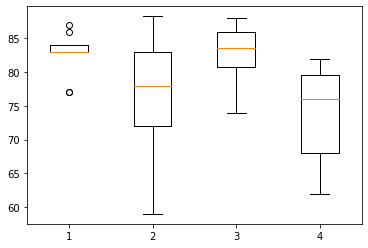

In [132]:
fig1, ax1 = plt.subplots()
ax1.boxplot([
    gradRatesByStateRegion['2010'][gradRatesByStateRegion['Region'] == 'Northeast'],
    gradRatesByStateRegion['2010'][gradRatesByStateRegion['Region'] == 'South'],
    gradRatesByStateRegion['2010'][gradRatesByStateRegion['Region'] == 'Midwest'],
    gradRatesByStateRegion['2010'][gradRatesByStateRegion['Region'] == 'West'],
    ])
plt.show()

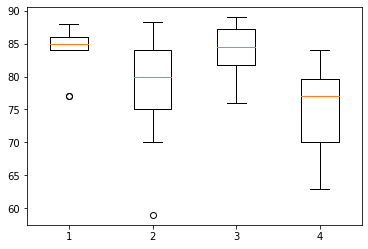

In [133]:
fig1, ax1 = plt.subplots()
ax1.boxplot([
    gradRatesByStateRegion['2011'][gradRatesByStateRegion['Region'] == 'Northeast'],
    gradRatesByStateRegion['2011'][gradRatesByStateRegion['Region'] == 'South'],
    gradRatesByStateRegion['2011'][gradRatesByStateRegion['Region'] == 'Midwest'],
    gradRatesByStateRegion['2011'][gradRatesByStateRegion['Region'] == 'West'],
    ])
plt.show()

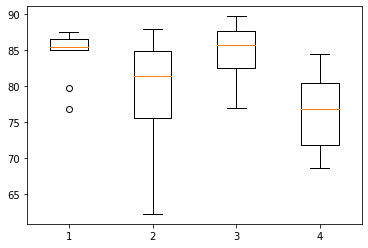

In [134]:
fig1, ax1 = plt.subplots()
ax1.boxplot([
    gradRatesByStateRegion['2012'][gradRatesByStateRegion['Region'] == 'Northeast'],
    gradRatesByStateRegion['2012'][gradRatesByStateRegion['Region'] == 'South'],
    gradRatesByStateRegion['2012'][gradRatesByStateRegion['Region'] == 'Midwest'],
    gradRatesByStateRegion['2012'][gradRatesByStateRegion['Region'] == 'West'],
    ])
plt.show()



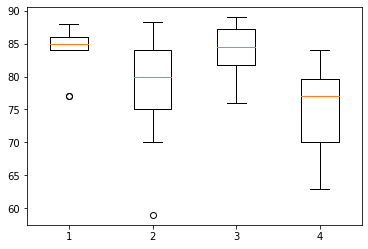

In [135]:
fig1, ax1 = plt.subplots()
ax1.boxplot([
    gradRatesByStateRegion['2013'][gradRatesByStateRegion['Region'] == 'Northeast'],
    gradRatesByStateRegion['2013'][gradRatesByStateRegion['Region'] == 'South'],
    gradRatesByStateRegion['2013'][gradRatesByStateRegion['Region'] == 'Midwest'],
    gradRatesByStateRegion['2013'][gradRatesByStateRegion['Region'] == 'West'],
    ])
plt.show()

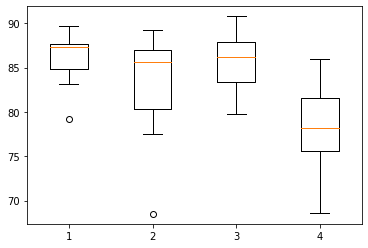

In [137]:
fig1, ax1 = plt.subplots()
ax1.boxplot([
    gradRatesByStateRegion['2014'][gradRatesByStateRegion['Region'] == 'Northeast'],
    gradRatesByStateRegion['2014'][gradRatesByStateRegion['Region'] == 'South'],
    gradRatesByStateRegion['2014'][gradRatesByStateRegion['Region'] == 'Midwest'],
    gradRatesByStateRegion['2014'][gradRatesByStateRegion['Region'] == 'West'],
    ])
plt.show()

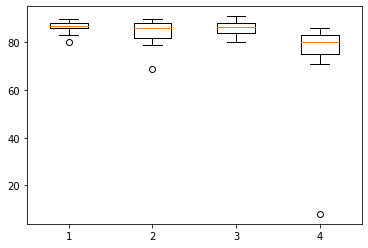

In [139]:
fig1, ax1 = plt.subplots()
ax1.boxplot([
    gradRatesByStateRegion['2015'][gradRatesByStateRegion['Region'] == 'Northeast'],
    gradRatesByStateRegion['2015'][gradRatesByStateRegion['Region'] == 'South'],
    gradRatesByStateRegion['2015'][gradRatesByStateRegion['Region'] == 'Midwest'],
    gradRatesByStateRegion['2015'][gradRatesByStateRegion['Region'] == 'West'],
    ])
plt.show()

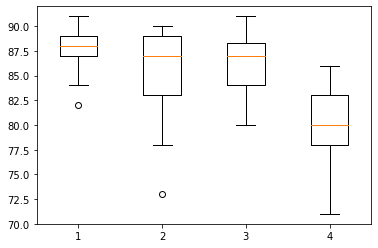

In [140]:
fig1, ax1 = plt.subplots()
ax1.boxplot([
    gradRatesByStateRegion['2016'][gradRatesByStateRegion['Region'] == 'Northeast'],
    gradRatesByStateRegion['2016'][gradRatesByStateRegion['Region'] == 'South'],
    gradRatesByStateRegion['2016'][gradRatesByStateRegion['Region'] == 'Midwest'],
    gradRatesByStateRegion['2016'][gradRatesByStateRegion['Region'] == 'West'],
    ])
plt.show()